In [29]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:5000px;
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

#### Напоминание о семантике действий:

* #### elementary_act(): Может упростить поддерево, если оно на каждом уровне глубины, начиная от листьев, восстанавливается определённо одним значением.

* #### subelementary_act(): M(x, y, not(x)) = y

* #### act3(): 2 подветви с 2 совпадающими аргументами и одним различающимся.

* #### act4(): 1 подветвь, 2 аргумента которой противоположны оставшимся аргументам основной ветви.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import time

SH = 100

In [31]:
def put_TT(variables):
    """
    ==========================================================
    Загружает в специальный файл вектор значений случайной ФАЛ
    ==========================================================
    """
    f = open('random_Karno.txt', 'w')
    r = np.random.randint(0, 2, np.power(2, variables))
    for i in range(np.power(2, variables)):
        f.write(str(r[i]))
    f.close()

In [32]:
def Maj_func(a, b, c):
    """
    ====================================================================================
    Реализует мажоритарную функцию. 
    При возможности однозначного результата (2 из 3 параметров одинаковые) выдаёт ответ.
    Иначе - None.
    ====================================================================================
    """
    abc = np.array([a, b, c])
    abc[abc == 0] = -1
    a0, b0, c0 = abc[0], abc[1], abc[2]
    abc[abc == None] = 0
    a1, b1, c1 = -abc[0], -abc[1], -abc[2]
    
    if (a0 == b0) | (b0 == c0):
        return b
    elif a0 == c0:
        return a
    elif a0 == b1:
        return c
    elif a0 == c1:
        return b
    elif b0 == c1:
        return a
    else:
        return None
    
class Maj:
    """
    ====================
    ====================
    Мажоритарный элемент
    ====================
    ====================
    
    Атрибуты:
    - self.value - реализация константы или переменной
    - self.arg1 - первый аргумент мажоритарного элемента
    - self.arg2 - второй аргумент мажоритарного элемента
    - self.arg3 - третий аргумент мажоритарного элемента
    - self.sh - сдвиг для представления пременных
    """
    def __init__(self, data=None, sh=SH):
        self.value = data
        self.arg1 = None
        self.arg2 = None
        self.arg3 = None
        self.back = None
        self.sh = sh
    
    def change(self, old, new):
        """
        =======================================================
        Заменить вхождения значения old на new во всей надсхеме
        =======================================================
        """
        if self.value != None:
            if self.value == old:
                self.value = new
        else:
            if self.arg1 != None:
                self.arg1.change(old, new)
            if self.arg2 != None:
                self.arg2.change(old, new)
            if self.arg3 != None:
                self.arg3.change(old, new)
    
    def elementary_check(self):
        """
        =================================================================
        Проверка возможности заменить элемент на реализуемое большинство. 
        Если можно, возвращает это значение.
        Если нельзя, возвращает None.
        =================================================================
        """
        if self.value != None:
            return self.value
        res1 = self.arg1.elementary_check()
        res2 = self.arg2.elementary_check()
        res3 = self.arg3.elementary_check()
        res = Maj_func(res1, res2, res3)
        if res != None:
            res = int(res)
        return res
    
    def subelementary_check(self):
        """
        ===========================================================================
        Проверка возможности заменить элемент на неконфликтующее в тройке значение. 
        Если можно, возвращает это значение.
        Если нельзя, возвращает None.
        ===========================================================================
        """
        a = self.two_end()
        if a is None:
            return
        a_arg = self.to_arg(a)
        a_exc = np.delete(np.arange(3), a)
        a_exc = np.array([self.to_arg(x).value for x in a_exc])
        a_exc[a_exc == 0] = -1
        if np.sum(a_exc) == 0:
            return a_arg
        
    def act3_check(self): # !!! Полегче бы
        """
        ======================================================================================
        Проверка возможности редуцирования 2 подветвей при паре и тройке различных аргументах.
        ======================================================================================
        """
        a = self.one_end()
        if a is None:
            return
        a_arg = self.to_arg(a)
        self.change(0, -1)
        
        z = a_arg.value
        a_exc = np.delete(np.arange(3), a)
        a_exc = [self.to_arg(x) for x in a_exc]
        b = a_exc[0].all_end()
        c = a_exc[1].all_end()
        if b is None or c is None:
            self.change(-1, 0)
            return
        if not b or not c:
            self.change(-1, 0)
            return
        b = [a_exc[0].arg1.value, a_exc[0].arg2.value, a_exc[0].arg3.value]
        c = [a_exc[1].arg1.value, a_exc[1].arg2.value, a_exc[1].arg3.value]
        if z in b and z in c:
            b.remove(z)
            c.remove(z)
            flag = 'z with z'
        elif -z in b and -z in c:
            b.remove(-z)
            c.remove(-z)
            flag = 'z with -z'
        else:
            self.change(-1, 0)
            return
        if not(b[0] in c or b[1] in c):
            self.change(-1, 0)
            return
        if b[0] in c:
            d = b[0]
            b.remove(d)
            c.remove(d)
        elif b[1] in c:
            d = b[1]
            b.remove(d)
            c.remove(d)
        else:
            self.change(-1, 0)
            return
        if c[0] != -b[0]:
            self.change(-1, 0)
            return
        if flag == 'z with z':
            self.change(-1, 0)
            if z == 1:
                return 1
            else:
                return 0
        elif flag == 'z with -z':
            self.change(-1, 0)
            return d
        
    def act4_check(self):
        """
        ==================================================================================
        Проверка возможности редуцирования 1 подветви при двух парах различных аргументах.
        ==================================================================================
        """
        a = self.two_end()
        if a is None:
            return
        b = self.to_arg(a).all_end()
        if b != True:
            return
        self.change(0, -1)
        b = self.to_arg(a)
        b_arg = [b.to_arg(x).value for x in range(3)]
        a_arg = np.delete(np.arange(3), a)
        a_arg = [self.to_arg(x).value for x in a_arg]
        if -a_arg[0] in b_arg:
            d = a_arg[0]
            a_arg.remove(d)
            b_arg.remove(-d)
        else:
            self.change(-1, 0)
            return
        if -a_arg[0] in b_arg:
            d = a_arg[0]
            a_arg.remove(d)
            b_arg.remove(-d)
        else:
            self.change(-1, 0)
            return
        self.change(-1, 0)
        return a, b_arg[0]

    
    def all_end(self):
        """
        =========================================================================
        Проверка, что все подветви имеют глубину 0 (реализуют только 1 значение).
        Возвращает None, если одна и ветвей отсутствует.
        Иначе возвращает bool-значение.
        =========================================================================
        """
        if self.arg1 is None or self.arg2 is None or self.arg3 is None:
            return
        return not (self.arg1.value is None or self.arg2.value is None or self.arg3.value is None)
    
    def one_end(self):
        """
        ===============================================================================
        Проверка, что только одна ветвь имеет глубину 0.
        Возвращает None, если одна и ветвей отсутствует или не 1 ветвь имеет глубину 0.
        Иначе возвращает номер оканчивающейся ветви.
        ===============================================================================
        """
        if self.arg1 is None or self.arg2 is None or self.arg3 is None:
            return
        a1 = int(self.arg1.value is None)
        a2 = int(self.arg2.value is None)
        a3 = int(self.arg3.value is None)
        a = np.array([a1, a2, a3])
        if np.sum(a) == 2:
            return int(np.arange(3)[a == 0])
        
    def two_end(self):
        """
        ===============================================================================
        Проверка, что две ветви имеют глубину 0.
        Возвращает None, если одна и ветвей отсутствует или не 2 ветви имеют глубину 0.
        Иначе возвращает номер неоканчивающейся ветви.
        ===============================================================================
        """
        if self.arg1 is None or self.arg2 is None or self.arg3 is None:
            return
        a1 = int(self.arg1.value is None)
        a2 = int(self.arg2.value is None)
        a3 = int(self.arg3.value is None)
        a = np.array([a1, a2, a3])
        if np.sum(a) == 1:
            return int(np.arange(3)[a == 1])
        
    def to_arg(self, x):
        attr_list = [self.arg1, self.arg2, self.arg3]
        return attr_list[x]  
    
    def show(self):
        """
        ===========
        Показ схемы
        ===========
        """
        if self.value != None:
            print(int(self.value), end=' ')
        else:
            print('(', end=' ')
            self.arg1.show()
            print('#', end=' ')
            self.arg2.show()
            print('#', end=' ')
            self.arg3.show()
            print(')', end=' ')
            
    def compute(self, x, variables): 
        """
        ===============================
        Вычисление схемы на наборе БП x
        ===============================
        """
        if self.value != None:
            if (self.value == 1) or (self.value == 0):
                return self.value
            if self.value > 0:
                return int((x & (1 << int(variables - (self.value - self.shift)))) != 0)
            else:
                return int((x & (1 << int(variables - (-self.value - self.shift)))) == 0)
        res1 = int(self.arg1.compute(x, variables))
        res2 = int(self.arg2.compute(x, variables))
        res3 = int(self.arg3.compute(x, variables))
        return (res1 & res2) ^ (res1 & res3) ^ (res2 & res3)       
        
    def clear_up(self):
        self.arg1 = None
        self.arg2 = None
        self.arg3 = None
    
    def complexity(self):
        if self.value != None:
            return 0
        else:
            return self.arg1.complexity() + self.arg2.complexity() + self.arg3.complexity() + 1
        
    def depth(self):
        if self.value != None:
            return 0
        else:
            return np.max(np.array([self.arg1.depth(), self.arg2.depth(), self.arg3.depth()])) + 1

In [33]:
class Maj_Tree:
    """
    ===============================
    ===============================
    Схема из мажоритарных элементов
    ===============================
    ===============================
    
    Аттрибуты:
    - self.root - корень схемы
    - self.var - число переменных реализуемой ФАЛ
    - self.sh - сдвиг для представления переменных
    """
    def __init__(self, sh=SH):
        self.root = None
        self.var = 0
        self.sh = SH
        
    def fit_from_file(self, filename, var):
        try:
            f = open(filename, 'r')
            self.var = var
            self.string = ''.join(f.read().split('\n'))[:np.power(2, var)]
            f.close()
            print('FAL-vector: ', self.string)
            if len(self.string) < np.power(2, var):
                print('Not enough digits!!!\n')
                raise FileNotFoundError
            self.string = np.array(list(self.string), dtype=int).reshape((-1, 2)).T
            
            self.behav_last = np.zeros(self.string.shape[1])
            self.behav_last[(self.string[0] == self.string[1]) & (self.string[0] == 1)] = 1
            self.behav_last[(self.string[0] != self.string[1]) & (self.string[0] == 0)] = 2
            self.behav_last[(self.string[0] != self.string[1]) & (self.string[0] == 1)] = 3
            self.string = self.string.T.reshape(-1)
        except FileNotFoundError:
            print('Can\'t open your file(')
        
    def p0(self, a, b, x):
        x <<= 1
        x |= b
        M = Maj(sh=self.sh)
        M01 = self.p1(a + 1, x)
        M.arg1 = M01
        M01.back = M
        M02 = Maj(sh=self.sh)
        if (b == 1):
            M02.value = self.sh + a
        else:
            M02.value = -self.sh - a
        M.arg2 = M02
        M02.back = M
        M03 = Maj(0, sh=self.sh)
        M.arg3 = M03
        M03.back = M
        return M
    
    def p1(self, a, x):
        if a == self.var:
            if self.behav_last[x] == 2:
                M = Maj(self.sh + self.var, sh=self.sh)
                return M
            elif self.behav_last[x] == 3:
                M = Maj(-self.sh - self.var, sh=self.sh)
                return M;
            else:
                M = Maj(self.behav_last[x], sh=self.sh)
                return M;
        else:
            M = Maj(sh=self.sh)
            M01 = self.p0(a, 0, x)
            M.arg1 = M01
            M01.back = M
            M02 = self.p0(a, 1, x);
            M.arg2 = M02
            M02.back = M  
            M03 = Maj(1, sh=self.sh)
            M.arg3 = M03
            M03.back = M
            return M
    
    def make_scheme(self):
        self.root = self.p1(1, 0)
        
    def show_scheme(self):
        print('Scheme:')
        self.root.show()
        
    def compute(self, x):
        return self.root.compute(x, self.var)
    
    def complexity(self):
        return self.root.complexity()
    
    def test(self, output=False):
        if output:
            print('Res True')
        for i in range(np.power(2, self.var)):
            res = self.compute(i)
            if output:
                print(res, self.string[i])
            if res != self.string[i]:
                print('!!!')

In [34]:
class Agent():
    """
    ===============
    ===============
    Упрощение схемы
    ===============
    ===============
    
    Аттрибуты:
    - self.acts_general - все возможные действия агента
    - self.actnames_general - обозначения всех возможных действий агента
    - self.acts - текущий набор действий агента
    - self.actnames - набор обозначений текущих действий
    - self.M - схема для упрощения - исходный вид
    - self.T - схема для упрощения - текущий вид
    - self.pos - позиция в схеме
    - self.state - состояние агента == кодированная позиция в схеме
    - self.start - начальное состояние
    - self.states - множество пройденных состояний
    - self.q - таблица: каждому состоянию при совершении действия сопоставляется value этого действия для каждого действия 
    - self.gamma - коэффициент дискаунтирования
    - self.fin - конечное состояние
    """
    def __init__(self, M, act_nums=None):
        """
        =========
        Инициация
        =========
        
        Требуется подать схему M и список возможных действий через act_nums. Первые 4 действия (перемещение)
        обязательны и включаются автоматически, для остальных нумерация идёт с нуля.
        """
        self.acts_general = [self.up1, 
                             self.up2, 
                             self.up3, 
                             self.back, 
                             self.elementary_act, 
                             self.subelementary_act,
                             self.act3,
                             self.act4]
        self.actnames_general = ['up1', 
                                 'up2', 
                                 'up3', 
                                 'back', 
                                 'elementary_act', 
                                 'subelementary_act',
                                 'act3', 
                                 'act4']
        if act_nums is None:
            self.acts = self.acts_general
            self.actnames = self.actnames_general
        else:
            self.acts = self.acts_general[:4] + [self.acts_general[4 + num] for num in act_nums]
            self.actnames = self.actnames_general[:4] + [self.actnames_general[4 + num] for num in act_nums]
            #self.acts = self.acts_general[:3] + [self.acts_general[4 + num] for num in act_nums]
            #self.actnames = self.actnames_general[:3] + [self.actnames_general[4 + num] for num in act_nums]
        self.M = copy.deepcopy(M)
        self.T = copy.deepcopy(self.M)
        self.pos = self.T.root
        self.state = 0
        self.start = 0
        self.states = []
        self.q = {}
        self.gamma = 0.1
        self.fin = 'FINAL'
        
    def fit(self):
        """
        ============================
        Возвращение к исходной схеме
        ============================
        """
        self.T = copy.deepcopy(self.M)
        self.pos = self.T.root
        self.state = 0
    
    def show(self, w='p'):
        if w == 'p':
            print('pos.print():')
            self.pos.show()
            
        else:
            print('Tree.print():')
            self.T.show_scheme()
        print('\n')
    
    def complexity(self):
        return self.T.complexity()
    
    def qmul(self, a):
        for s in self.states:
            self.q[s] *= a
    
    def up1(self):
        if not(self.pos.arg1 is None):
            self.pos = self.pos.arg1
            self.state = 10 * self.state + 1
            
    def up2(self):
        if not(self.pos.arg2 is None):
            self.pos = self.pos.arg2
            self.state = 10 * self.state + 2
            
    def up3(self):
        if not(self.pos.arg3 is None):
            self.pos = self.pos.arg3
            self.state = 10 * self.state + 3
    
    def back(self):
        if self.pos != self.T.root:
            self.pos = self.pos.back
            self.state //= 10
            
    def root(self):
        self.pos = self.T.root
        self.state = self.start
        
    def elementary_act(self):
        if not(self.pos.value is None):
            return
        elementary = self.pos.elementary_check()
        if not(elementary is None):
            self.pos.clear_up()
            self.pos.value = elementary
            self.state = self.fin
        
    def subelementary_act(self):
        if not(self.pos.value is None):
            return
        subelementary = self.pos.subelementary_check()
        if not(subelementary is None):
            self.pos.value = 'sub'
            self.back()
            if self.pos.arg1.value == 'sub':
                self.pos.arg1 = subelementary
            elif self.pos.arg2.value == 'sub':
                self.pos.arg2 = subelementary
            elif self.pos.arg3.value == 'sub':
                self.pos.arg3 = subelementary
            self.state = self.fin
            if self.pos.arg1.value == 'sub':
                self.pos.arg1.value = None
            if self.pos.arg2.value == 'sub':
                self.pos.arg2.value = None
            if self.pos.arg3.value == 'sub':
                self.pos.arg3.value = None
    
    def act3(self):
        if not(self.pos.value is None):
            return
        val = self.pos.act3_check()
        if not(val is None):
            self.pos.value = 'sub'
            self.back()
            if self.pos.arg1.value == 'sub':
                self.pos.arg1.value = val
            elif self.pos.arg2.value == 'sub':
                self.pos.arg2.value = val
            elif self.pos.arg3.value == 'sub':
                self.pos.arg3.value = val
            self.state = self.fin
    
    def act4(self):
        if not(self.pos.value is None):
            return 
        aaa = self.pos.act4_check()
        if not(aaa is None):
            arg = aaa[0]
            val = aaa[1]
            if arg == 0:
                self.pos.arg1.value = val
                #self.pos.arg1.arg1 = None
                #self.pos.arg1.arg2 = None
                #self.pos.arg1.arg3 = None
            if arg == 1:
                self.pos.arg2.value = val
                #self.pos.arg2.arg1 = None
                #self.pos.arg2.arg2 = None
                #self.pos.arg2.arg3 = None
            if arg == 2:
                self.pos.arg3.value = val
                #self.pos.arg3.arg1 = None
                #self.pos.arg3.arg2 = None
                #self.pos.arg3.arg3 = None
            self.state = self.fin
    
    def stop(self):
        raise StopIteration
        
    def qnull(self):
        for s in self.states:
            self.q[s] = np.zeros_like(self.acts)
    
    def qnullcond(self, threshold=1e-30, val=1e-30):
        for s in self.states:
            self.q[s][self.q[s] < -threshold] = -val
            self.q[s][self.q[s] > threshold] = val
            self.q[s][np.abs(self.q[s]) == np.inf] = 0
    
    def chact(self, s, eps, out=False):
        """
        ==========================================================================
        Выбор действия. eps задаёт порог. Если рандомное число его превысит, 
        выберется наиболее "вознаграждённое" действие. Иначе - любое из оставшхся.
        Само действие выполняется тут же.
        ==========================================================================
        """
        par = np.random.random()
        if par >= eps:
            self.acts[np.argmax(self.q[s])]()
            if out == True:
                print('act: ', self.actnames[np.argmax(self.q[s])])
                print('state: ', self.state)
                print('==================')
            return np.argmax(self.q[s]), self.state
        else:
            par = np.random.randint(0, len(self.q[s]) - 1)
            if par >= np.argmax(self.q[s]):
                par += 1
            self.acts[par]()
            if out == True:
                print('act: ', self.actnames[par])
                print('state: ', self.state)
                print('==================')
            return par, self.state
    
    
    def episode(self, n, eps, position=None, out=False):
        """
        ==================================================================
        Запуск последовательности действий для изучения. 
        Каждая последовательность начинается из одного и того же состояния
        исходной схемы.
        ==================================================================
        """
        self.fit()   ### !!!
        self.rewards = []
        self.actrow = []
        self.sts = [self.state]
        for i in range(n):
            old_state = self.state
            self.states += [self.state]
            if not (self.state in self.q):
                self.q[self.state] = np.zeros_like(self.acts)
            act_num, new_state = self.chact(self.state, eps, out)
            self.actrow += [act_num]
            self.sts += [new_state]
            
            ### Работаем с наградой, не зависящей от упрощения схемы
            if self.state == self.fin:
                self.rewards += [1e+1] #1e+1
                break
            else:
                self.rewards += [-(1e-300)] #1e-300
            if old_state == new_state:
                self.rewards[-1] -= 1e-50 #1e-50
            if i == n - 1:
                self.rewards[-1] -= 1e-50 #1e-50      
        self.rewards.reverse()
        self.actrow.reverse()
        self.sts.reverse()
        self.sts = self.sts[1:]
        for s in self.sts:
            if not(s in self.q):
                self.q[s] = np.zeros_like(self.acts)
                self.states += [s]
        self.q[self.sts[0]][self.actrow[0]] += self.rewards[0]
        for i in range(1, len(self.sts)):
            self.q[self.sts[i]][self.actrow[i]] += \
            self.rewards[i] + self.gamma * np.mean(self.q[self.sts[i - 1]])
    
    def many_episodes(self, n, N, position=None, out=False):
        """
        ================================================
        Запуск последовательности эпизодов для изучения.
        N - число эпизодов, n - число действий в каждом.
        Если происходит упрощение - эпизод обрывается.
        ================================================
        """
        for i in range(N):
            self.episode(n, 0.99 ** i, position, out)
            if out == True:
                print('\n=/=/=/=/=/=/=/=/=/=/=/=/=\nNew episode (', i,')\n=/=/=/=/=/=/=/=/=/=/=/=/=\n')
                
    def chain_of_epoches(self, n, N, NNN, out=False, make_info=False):
        """
        ==================================================
        После "обучения" через последовательность эпизодов
        происходит наиболее выигрышная последовательность 
        действий и единократное упрощение.
        Эта процедура повторяется несколько раз.
        n - число действий в 1 эпизоде
        N - число эпизодов для обучения
        NNN - число эпох
        ==================================================
        """
        position = self.start
        flag_L = self.complexity()
        flag = False
        info_times = [0]
        info_Ls = [self.complexity()] 
        for i in range(NNN):
            print('L', self.complexity())
            print('Episode:', i)
            if out:
                self.M.print_scheme()
            self.qnull()
            
            start = time.time()
            self.many_episodes(n, N, position)
            self.fit()
            position = self.deploy(position)
            self.M = copy.deepcopy(self.T)
            info_times += [info_times[-1] + time.time() - start]
            info_Ls += [self.complexity()]
            
            if self.complexity() == flag_L:
                if flag == False:
                    flag = True
                else:
                    break
            else:
                flag = False
            flag_L = self.complexity()
        if make_info:
            return info_times, info_Ls
            
    
    def deploy(self, position=None):
        """
        =======================================
        Эксплуатирование накопленного обучения.
        =======================================
        """
        #print('\n+++++ DEPLOYED +++++\n')
        self.state = self.start
        self.root()
        k = 5 * np.log2(self.complexity()) // 1
        sts_row = []
        act_row = []
        while k > 0 and self.state != self.fin:
            if not self.state in self.q:
                self.q[self.state] = np.zeros_like(self.acts)
            sts_row += [self.state]
            act_row += [self.actnames[np.argmax(self.q[self.state])]]
            self.acts[np.argmax(self.q[self.state])]()
            k -= 1
        if k != 0:
            pass
            #for i in range(len(sts_row)):
            #    print(sts_row[i], act_row[i])
        else:
            print('Inf Loop')
            
            
            
    def many_episodes2(self, n, N, position=None, out=False):
        """
        ================================================

        ================================================
        """
        k = 0
        while k < N and self.state != self.fin:
            self.episode(n, 0, position, out)
            k += 1
            if out == True:
                print('\n=/=/=/=/=/=/=/=/=/=/=/=/=\nNew episode (', i,')\n=/=/=/=/=/=/=/=/=/=/=/=/=\n')
                
    def chain_of_epoches2(self, n, N, threshold=1e-45, out=False, make_info=False):
        """
        ==================================================

        ==================================================
        """
        position = self.start
        flag_L = self.complexity()
        flag = 0
        i = 0
        info_times = [0]
        info_Ls = [self.complexity()] 
        while True:
            print('L', self.complexity())
            print('Episode:', i)
            if out:
                self.M.print_scheme()

            start = time.time()
            self.many_episodes2(n, N, position)
            self.M = copy.deepcopy(self.T)
            self.fit()
            info_times += [info_times[-1] + time.time() - start]
            info_Ls += [self.complexity()]
            
            self.qnullcond(threshold, threshold)
            if self.complexity() == flag_L:
                if flag == 5:
                    break
                flag += 1
            else:
                flag = 0
            i += 1
            flag_L = self.complexity()
        if make_info:
            return info_times, info_Ls

In [35]:
def make_info(variables, n, N, NNN=250, act_nums=None, threshold=1e-45, file=None):
    if file is None:
        put_TT(variables)
        M = Maj_Tree(sh=SH)
        M.fit_from_file('random_Karno.txt', variables)
    else:
        M = Maj_Tree(sh=SH)
        M.fit_from_file(file, variables)
    M.make_scheme()
    M.show_scheme()
    print('\n')
    Ag = Agent(M, act_nums)
    info = {}
    info['alg1'] = {}
    info['alg2'] = {}
    info['alg1']['times'], info['alg1']['Ls'] = Ag.chain_of_epoches(n, N, NNN, make_info=True)
    
    M = Maj_Tree(sh=SH)
    if file is None:
        M.fit_from_file('random_Karno.txt', variables)
    else:
        M.fit_from_file(file, variables)
    M.make_scheme()
    Ag = Agent(M, act_nums)
    
    info['alg2']['times'], info['alg2']['Ls'] = Ag.chain_of_epoches2(n, N, threshold, make_info=True)
    return info

def show_info(info):
    fig, ax = plt.subplots(figsize=(20, 10))
    
    ax.set(facecolor = 'white')
    ax.grid()
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)
    ax.plot(info['alg1']['times'], info['alg1']['Ls'], c='orange', linewidth=5, linestyle='dotted', label='Упрощённый алгоритм')
    ax.scatter(info['alg1']['times'], info['alg1']['Ls'], c='orange', s=200)
    ax.plot(info['alg2']['times'], info['alg2']['Ls'], c='blue', linewidth=5, linestyle='dotted', label='Модифицированный алгоритм')
    ax.scatter(info['alg2']['times'], info['alg2']['Ls'], c='blue', s=200)
    ax.legend(fontsize=20)
    ax.set_xlabel('Время упрощения', fontsize=20)
    ax.set_ylabel('Сложность схемы', fontsize=20)

In [36]:
info = make_info(variables=7, n=100, N=2000, act_nums=[0, 1], threshold=1e-45)

FAL-vector:  01010100000111100000110000101011111111000000110101100001000000001011011100000001110101101010111101111101000110110001011111111111
Scheme:
( ( ( ( ( ( ( ( ( ( ( ( 107 # -106 # 0 ) # ( 107 # 106 # 0 ) # 1 ) # -105 # 0 ) # ( ( ( 107 # -106 # 0 ) # ( 0 # 106 # 0 ) # 1 ) # 105 # 0 ) # 1 ) # -104 # 0 ) # ( ( ( ( ( 0 # -106 # 0 ) # ( 107 # 106 # 0 ) # 1 ) # -105 # 0 ) # ( ( ( 1 # -106 # 0 ) # ( -107 # 106 # 0 ) # 1 ) # 105 # 0 ) # 1 ) # 104 # 0 ) # 1 ) # -103 # 0 ) # ( ( ( ( ( ( ( 0 # -106 # 0 ) # ( 0 # 106 # 0 ) # 1 ) # -105 # 0 ) # ( ( ( 1 # -106 # 0 ) # ( 0 # 106 # 0 ) # 1 ) # 105 # 0 ) # 1 ) # -104 # 0 ) # ( ( ( ( ( 0 # -106 # 0 ) # ( -107 # 106 # 0 ) # 1 ) # -105 # 0 ) # ( ( ( -107 # -106 # 0 ) # ( 1 # 106 # 0 ) # 1 ) # 105 # 0 ) # 1 ) # 104 # 0 ) # 1 ) # 103 # 0 ) # 1 ) # -102 # 0 ) # ( ( ( ( ( ( ( ( ( 1 # -106 # 0 ) # ( 1 # 106 # 0 ) # 1 ) # -105 # 0 ) # ( ( ( 1 # -106 # 0 ) # ( 0 # 106 # 0 ) # 1 ) # 105 # 0 ) # 1 ) # -104 # 0 ) # ( ( ( ( ( 0 # -106 # 0 ) # ( 0 # 106 # 0 ) 

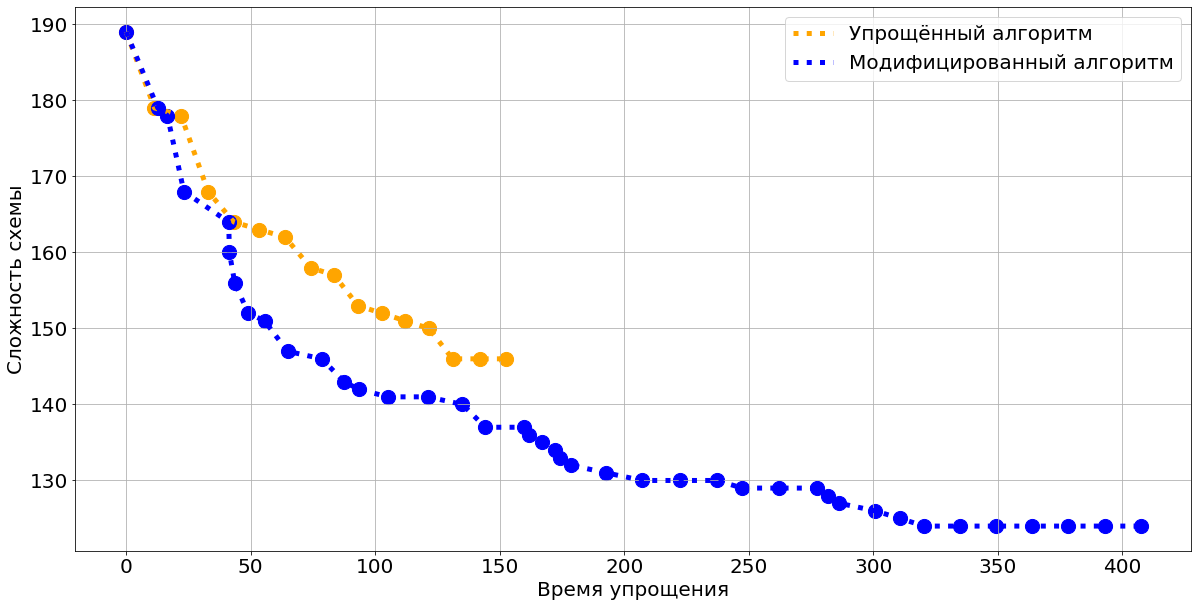

In [37]:
show_info(info)

In [ ]:
S = 9
put_TT(S)
M = Maj_Tree(sh=SH)
M.fit_from_file('random_Karno.txt', S)
M.make_scheme()
M.show_scheme()
print('\n')
Ag = Agent(M, [0, 1])
Ag.chain_of_epoches2(30, 7000, 1e-49)
# 100 2000 1e-45 for 5 or 10 5000 1e-49
# 20 5000 1e-49 for 7


In [ ]:
S = 5
put_TT(S)
M = Maj_Tree(sh=SH)
M.fit_from_file('random_Karno.txt', S)
M.make_scheme()
M.show_scheme()
Ag = Agent(M, [0, 1])
Ag.chain_of_epoches(200, 2000, 250)

In [ ]:
Ag = Agent(M, [0, 1])
Ag.chain_of_epoches(100, 2000, 250)
#Ag.chain_of_epoches(70, 500, 250) # Для 7
# Для 5  30, 1000
# Для 6  50, 1000, 2 действия (эл)
# Для 7  50, 1000
# Для 8  ~~ 100, 1000

In [ ]:
MMM = copy.deepcopy(Ag.M)

In [46]:
MMM.show_scheme()

Scheme:
( ( ( ( ( ( 104 # -103 # 0 ) # 103 # 1 ) # -102 # 0 ) # ( ( ( 104 # -103 # 0 ) # ( -104 # 103 # 0 ) # 1 ) # 102 # 0 ) # 1 ) # -101 # 0 ) # ( ( ( ( -104 # -103 # 0 ) # -102 # 0 ) # ( ( -104 # -103 # 0 ) # 102 # 0 ) # 1 ) # 101 # 0 ) # 1 ) 

In [47]:
Ag = Agent(MMM, [2, 3])
Ag.chain_of_epoches(100, 2000, 250) 

L 16
Episode: 0

+++++ DEPLOYED +++++

0 up1
1 up1
11 up1
111 up1
1111 act4
L 15
Episode: 1

+++++ DEPLOYED +++++

Inf Loop
L 15
Episode: 2

+++++ DEPLOYED +++++

Inf Loop


In [16]:
Ag.M.show_scheme()

Scheme:
( ( ( ( ( 104 # 103 # 1 ) # -102 # 0 ) # ( ( ( 104 # -103 # 0 ) # ( -104 # 103 # 0 ) # 1 ) # 102 # 0 ) # 1 ) # -101 # 0 ) # ( ( ( ( -104 # -103 # 0 ) # -102 # 0 ) # ( ( -104 # -103 # 0 ) # 102 # 0 ) # 1 ) # 101 # 0 ) # 1 ) 

In [165]:
Ag = Agent(M)
Ag.episode(30, 1, out=True)

act:  up3
state:  3
act:  up2
state:  3
act:  up3
state:  3
act:  up2
state:  3
act:  up2
state:  3
act:  up3
state:  3
act:  back
state:  0
act:  back
state:  0
act:  up3
state:  3
act:  up3
state:  3
act:  up3
state:  3
act:  up2
state:  3
act:  up2
state:  3
act:  back
state:  0
act:  up3
state:  3
act:  up2
state:  3
act:  up2
state:  3
act:  up3
state:  3
act:  back
state:  0
act:  up2
state:  2
act:  up2
state:  22
act:  up2
state:  22
act:  elementary_act
state:  22
act:  back
state:  2
act:  back
state:  0
act:  back
state:  0
act:  back
state:  0
act:  back
state:  0
act:  up3
state:  3
act:  up3
state:  3


In [21]:
Ag.chain_of_epoches(20, 500, 1)

L 15
Episode: 0

+++++ DEPLOYED +++++

Inf Loop
